In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [4]:
years = range(2003, 2008)
columns = ["Year", "Month", "DayofMonth", "ArrDelay", "DepDelay"]
dataframes = (pd.read_csv("../data/{}.csv".format(year), usecols=columns) for year in years)
df = pd.concat(dataframes, ignore_index=False)

In [5]:
df["Date"] = df["Year"].map("{:04d}".format) + "-" + df["Month"].map("{:02d}".format) + "-" + df["DayofMonth"].map("{:02d}".format)
df["Date"] = pd.to_datetime(df["Date"])

df = df.set_index("Date")
df = df.sort_index()

In [6]:
df = df.drop(columns=['Year', 'Month', 'DayofMonth'])

In [7]:
df.head()

,ArrDelay,DepDelay
Date,,
2003-01-01,15.0,31.0
2003-01-01,0.0,0.0
2003-01-01,4.0,-5.0
2003-01-01,-7.0,0.0
2003-01-01,0.0,0.0


In [8]:
df["Delayed"] = (df["ArrDelay"] >= 15) | (df["DepDelay"] >= 15)

In [9]:
df[df["Delayed"] == True].head(20)

,ArrDelay,DepDelay,Delayed
Date,,,
2003-01-01,15.0,31.0,True
2003-01-01,24.0,27.0,True
2003-01-01,15.0,15.0,True
2003-01-01,16.0,17.0,True
2003-01-01,14.0,18.0,True
2003-01-01,26.0,10.0,True
2003-01-01,22.0,16.0,True
2003-01-01,11.0,28.0,True
2003-01-01,43.0,49.0,True


In [10]:
df.head(20)

,ArrDelay,DepDelay,Delayed
Date,,,
2003-01-01,15.0,31.0,True
2003-01-01,0.0,0.0,False
2003-01-01,4.0,-5.0,False
2003-01-01,-7.0,0.0,False
2003-01-01,0.0,0.0,False
2003-01-01,8.0,8.0,False
2003-01-01,3.0,0.0,False
2003-01-01,-13.0,-5.0,False
2003-01-01,-5.0,0.0,False


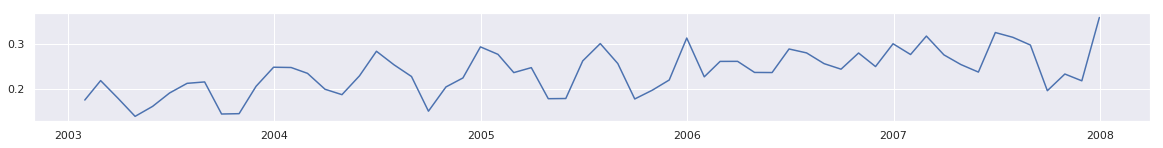

In [23]:
plt.figure(figsize=(20, 2))
by_month = df.resample("M")["Delayed"].mean()
sns.lineplot(data=by_month)

In [24]:
import sentiment
classifier = sentiment.LeastSquaresClassifier()

In [27]:
ts = by_month.index.astype(np.int64) // 10 ** 9
classifier.fit(ts, by_month.values)

1.04397e+09           1
1.04639e+09           1
1.04907e+09           1
1.05166e+09           1
1.05434e+09           1
1.05693e+09           1
1.05961e+09           1
1.06229e+09           1
1.06488e+09           1
1.06756e+09           1
1.07015e+09           1
1.07283e+09           1
1.07551e+09           1
1.07801e+09           1
1.08069e+09           1
1.08328e+09           1
1.08596e+09           1
1.08855e+09           1
1.09123e+09           1
1.09391e+09           1
 1.0965e+09           1
1.09918e+09           1
1.10177e+09           1
1.10445e+09           1
1.10713e+09           1
1.10955e+09           1
1.11223e+09           1
1.11482e+09           1
 1.1175e+09           1
1.12009e+09           1
1.12277e+09           1
1.12545e+09           1
1.12804e+09           1
1.13072e+09           1
1.13331e+09           1
1.13599e+09           1
1.13867e+09           1
1.14108e+09           1
1.14376e+09           1
1.14636e+09           1
1.14903e+09           1
1.15163e+09     

RMSE: 0.04364653497294893


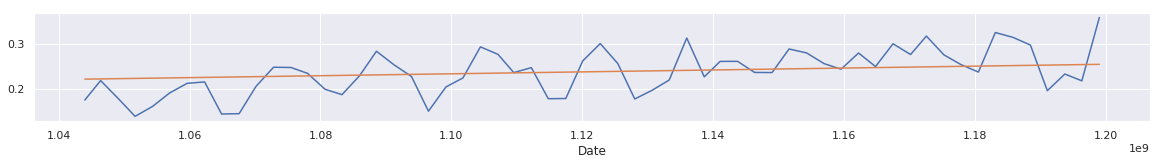

In [35]:
from sklearn.metrics import mean_squared_error
import math

y_pred = classifier.predict(ts)
plt.figure(figsize=(20, 2))
sns.lineplot(x=ts, y=by_month.values)
sns.lineplot(x=ts, y=y_pred)
print("RMSE: {}".format(math.sqrt(mean_squared_error(by_month.values, y_pred))))

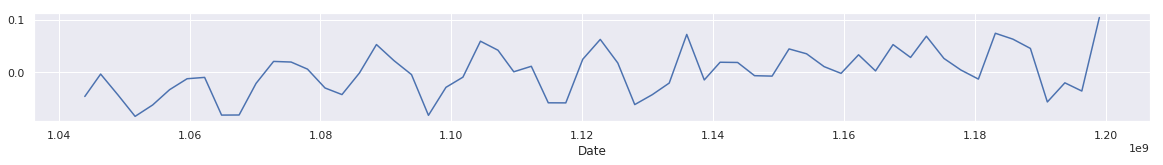

In [32]:
plt.figure(figsize=(20, 2))
sns.lineplot(x=ts, y=by_month.values - y_pred)

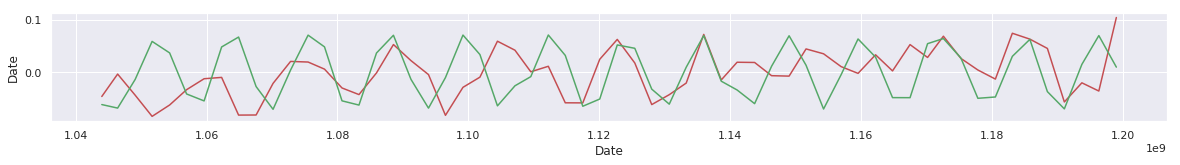

In [63]:
plt.figure(figsize=(20, 2))
sns.lineplot(x=ts, y=by_month.values-y_pred, color='r')
sns.lineplot(x=ts, y=1/20*np.sin(2.1*ts) + 1/20*np.cos(2.1*ts), color='g')

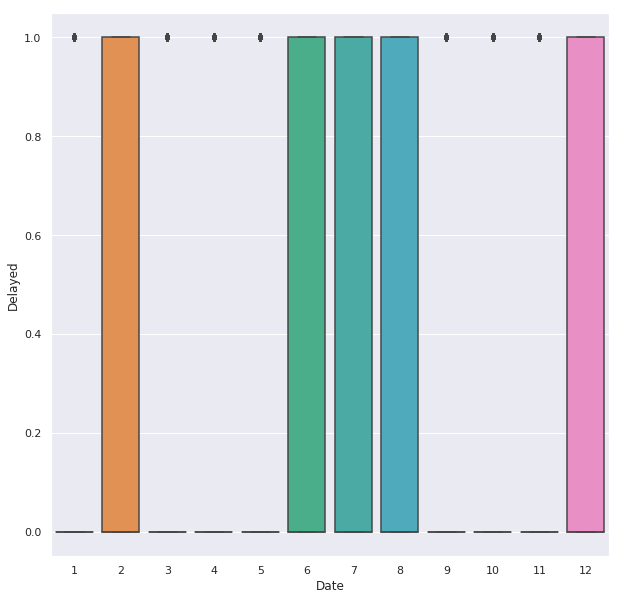

In [71]:
%matplotlib inline
plt.figure(figsize=(10, 10))
#delayed_by_month = df.groupby(df.index.month)["Delayed"].mean()
sns.boxplot(df.index.month, df["Delayed"])

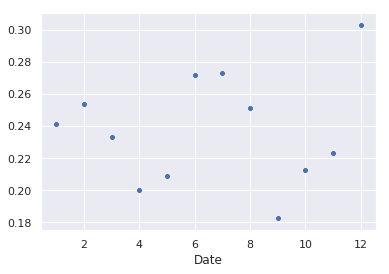

In [77]:
delayed_by_month = df.groupby(df.index.month)["Delayed"].mean()
sns.scatterplot(delayed_by_month.index, delayed_by_month.values)

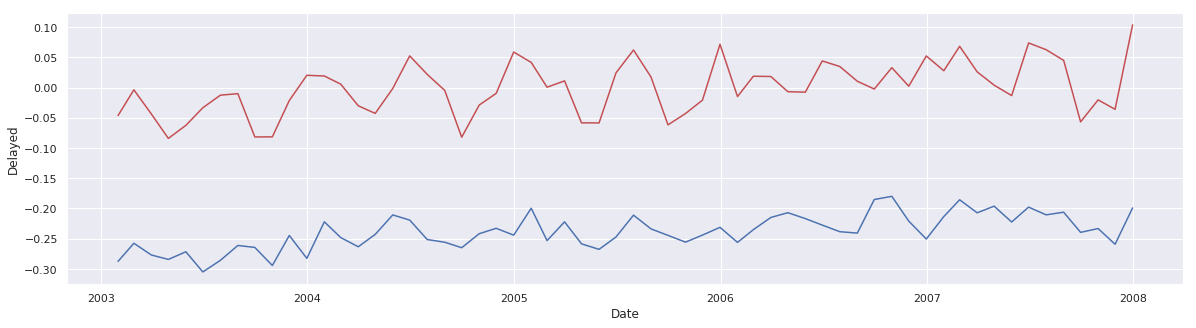

In [89]:
plt.figure(figsize=(20, 5))
mean_month_delay = dict(delayed_by_month)
delayed_by_month = df.groupby(df.index.month)["Delayed"].mean()
without_linear = by_month - y_pred
withouth_month = without_linear - without_linear.index.month.map(mean_month_delay)
sns.lineplot(by_month.index, by_month - y_pred, color='r')
sns.lineplot(by_month.index, withouth_month - y_pred, color='b')